In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
stud = pd.read_csv("Student.csv")
stud.describe()

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
count,649.000000,576.000000,576.000000,649.000000,649.000000,604.000000,649.000000,649.000000,649.000000,580.000000,649.000000,614.000000,649.000000,611.000000,603.000000,610.000000
mean,2.514638,2.303819,1.574653,0.221880,3.930663,3.172185,3.184900,1.502311,3.536210,3.746552,11.399076,11.586319,11.906009,16.747954,1.913765,2.262295
std,1.134552,1.111076,0.744592,0.593235,0.955717,1.044684,1.175766,0.924834,1.446259,4.732890,2.745265,2.927878,3.230656,1.216812,0.830798,1.285279
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000
75%,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,22.000000,4.000000,5.000000


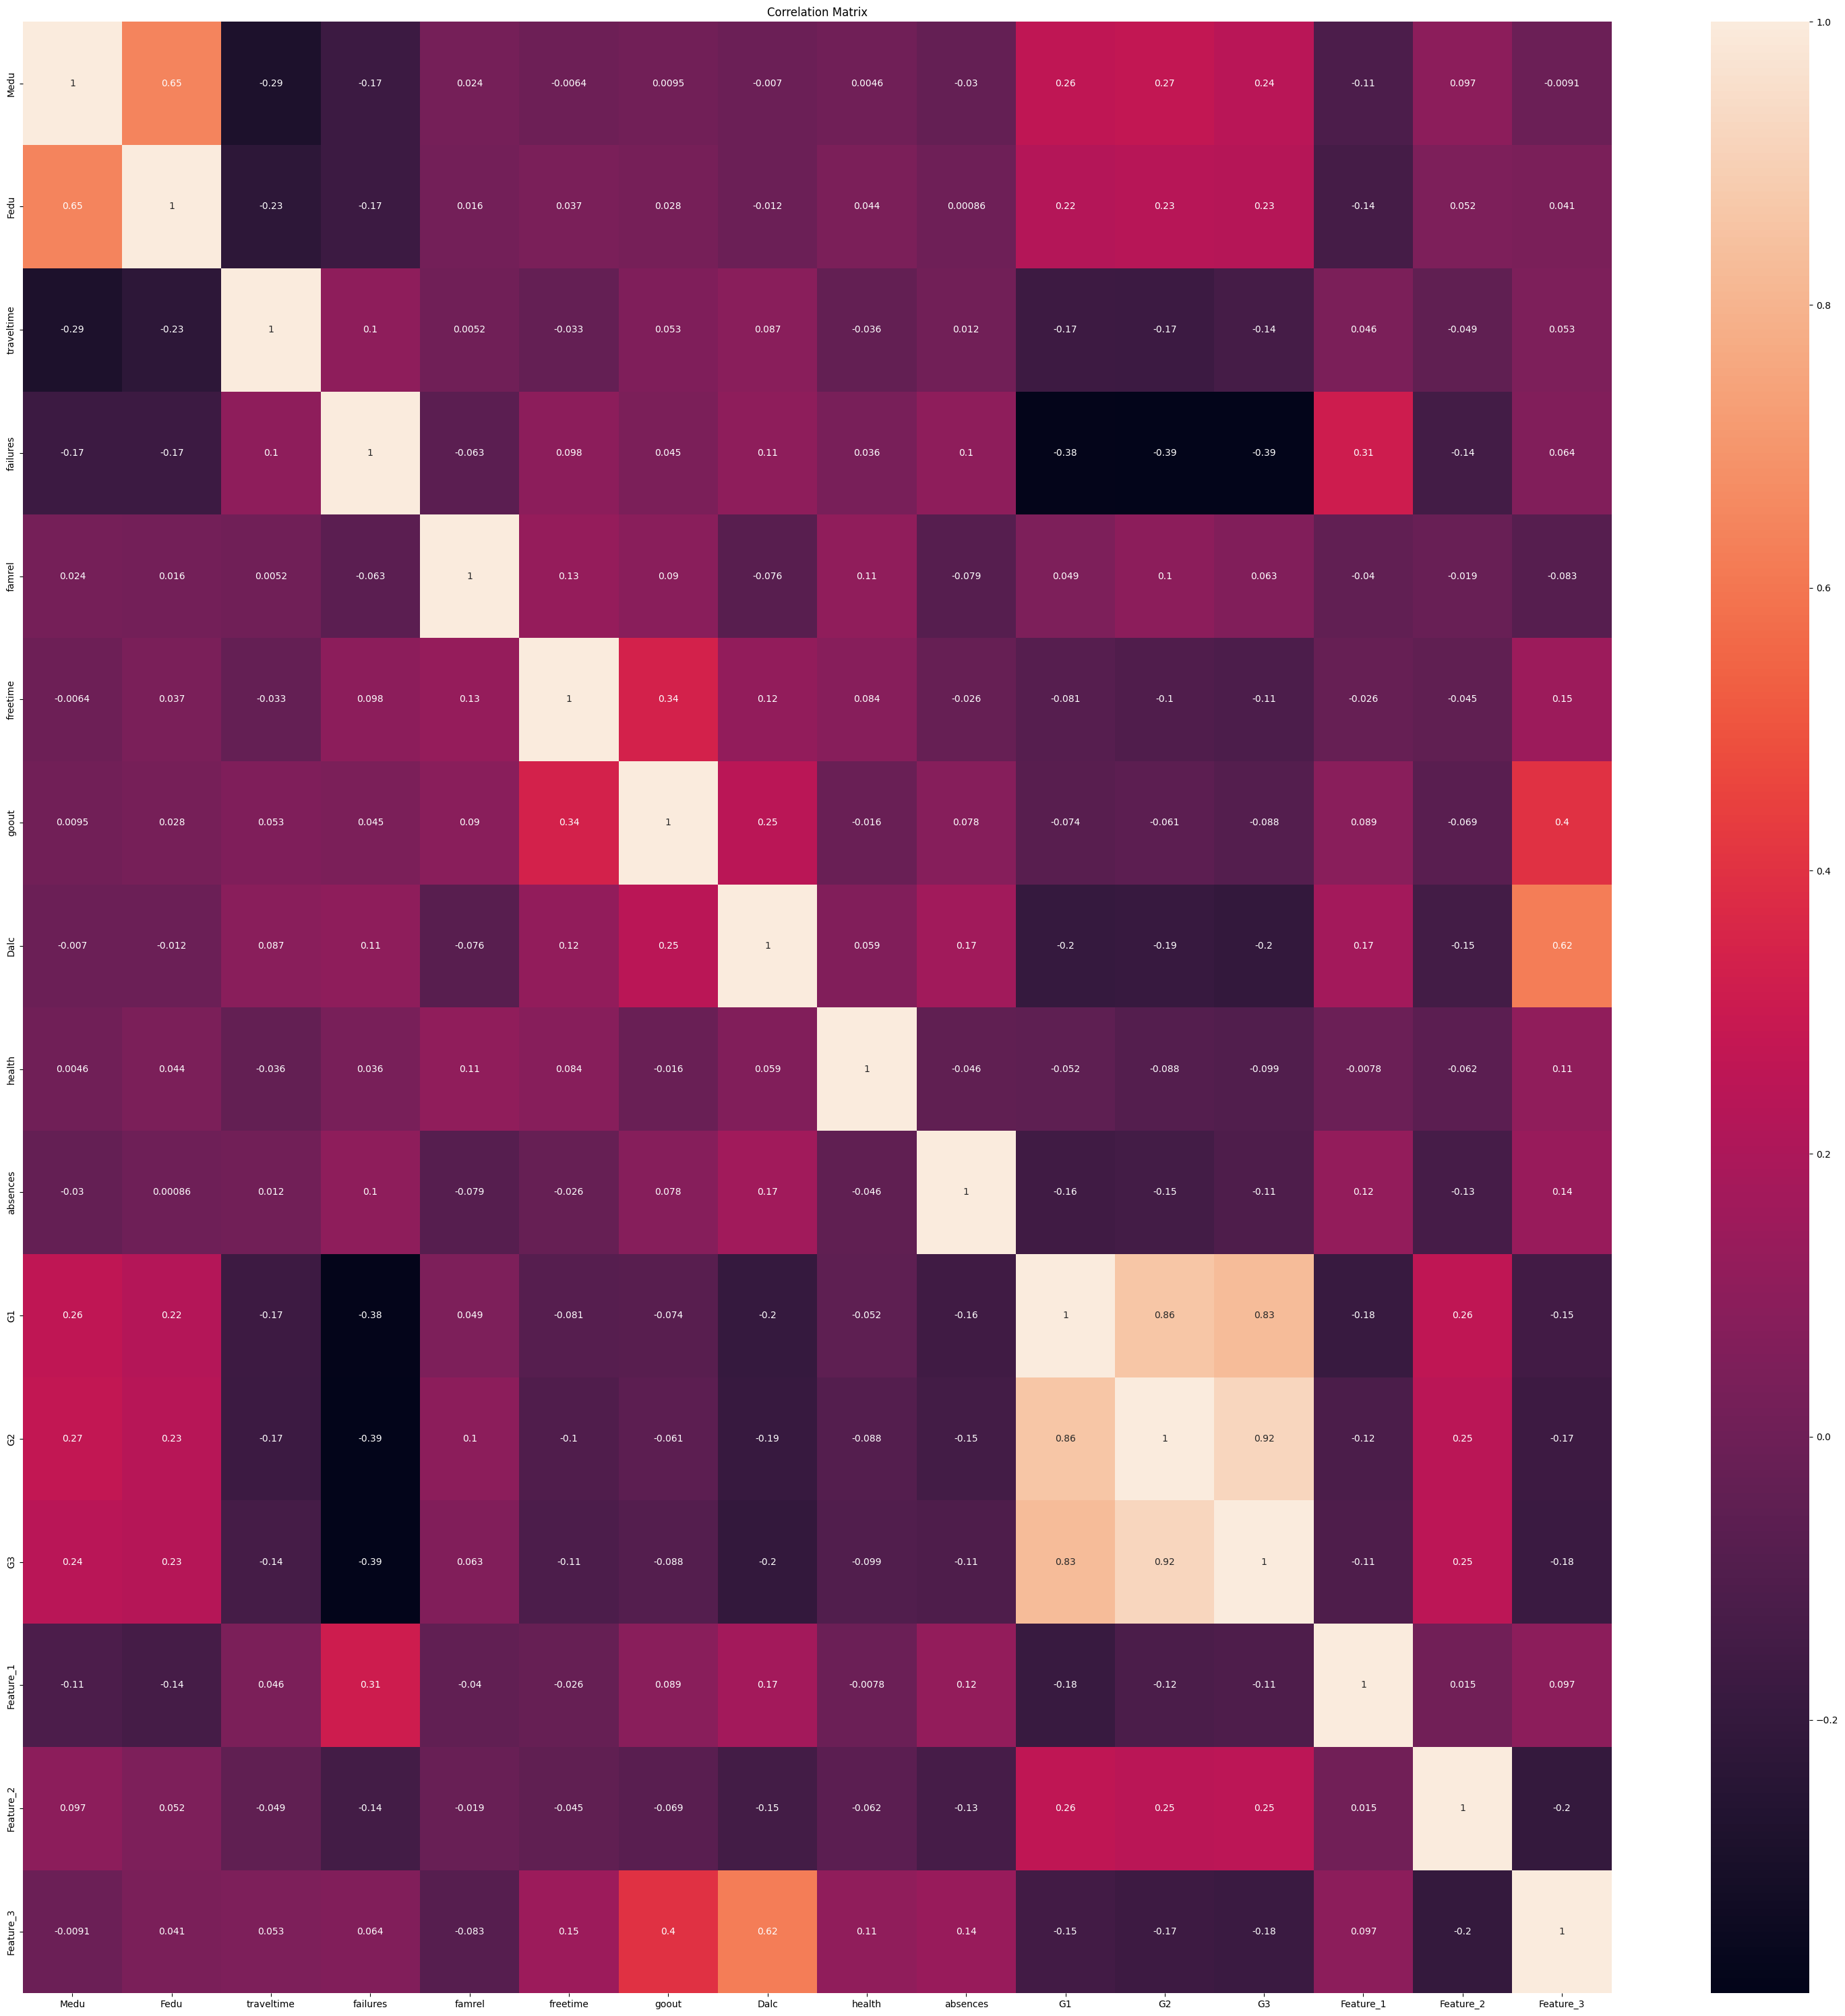

In [3]:
stud_numeric = stud.select_dtypes(include = ["number"])
corr_numerics = stud_numeric.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_numerics,annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>

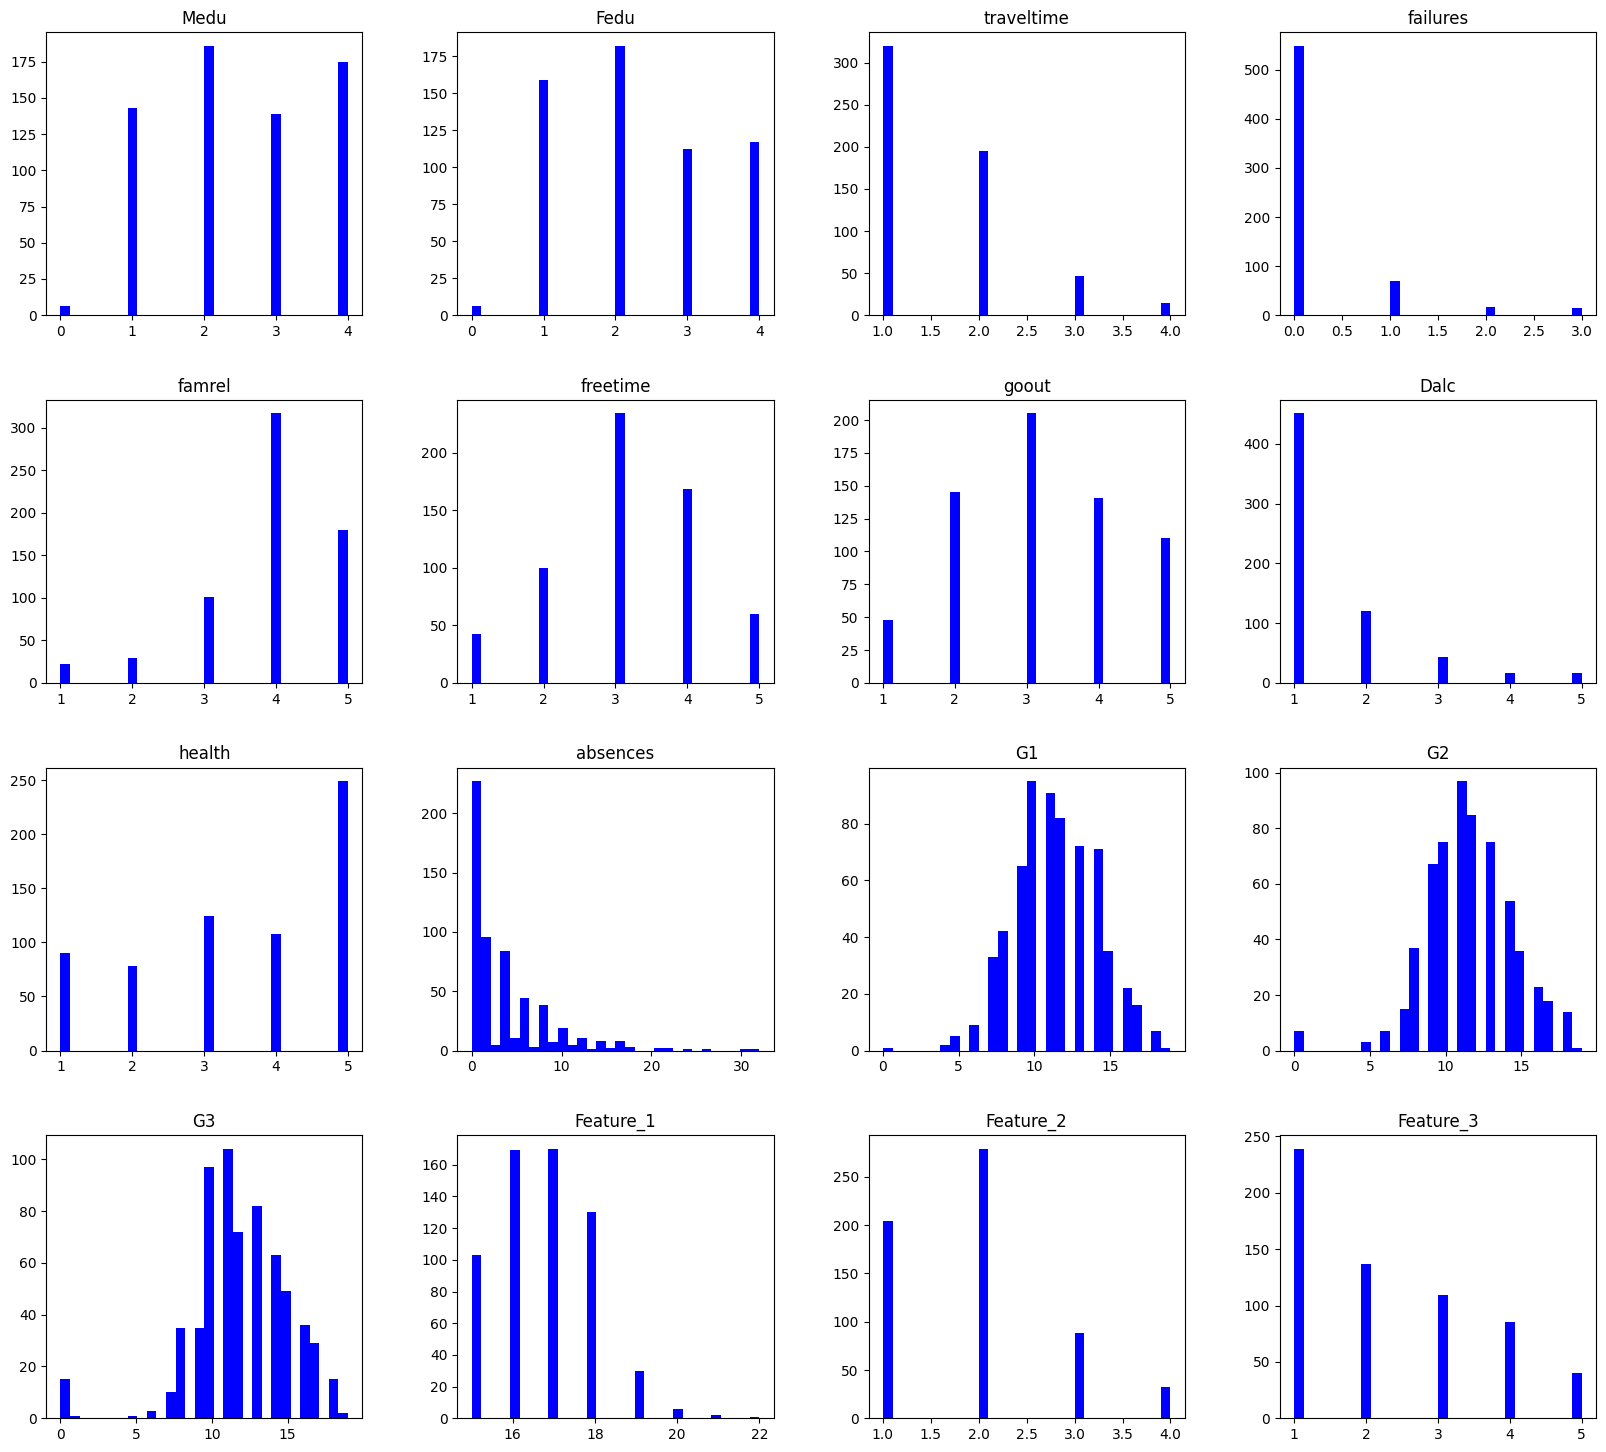

In [4]:

plt.tight_layout()
stud.hist(bins=30,color="blue",grid=False,figsize=(20,18))
plt.show()

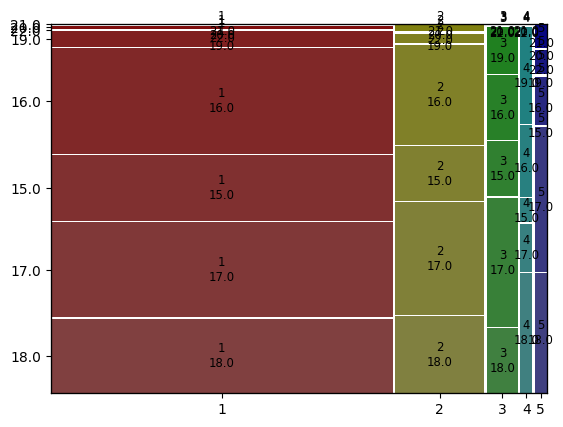

In [5]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(stud, ['Dalc', 'Feature_1'])
plt.show()
#Feature 1 is likely age as seen from the histogram
#Feature 2 is likely hours study as it corelates strongly with good academic performance
#Feature 3 is weekend alcohol consumption as it corellates very strongly with weekday consumption and negatively with grades

In [6]:
stud.isna().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
mode_impute = SimpleImputer(strategy="most_frequent")
mode_impute.fit(stud)
Fixed = mode_impute.transform(stud)
noblank = pd.DataFrame(Fixed,columns=stud.columns,index=stud.index)
#Mode is a suitable choice for these categorical values

In [8]:
noblank.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,2.0,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,2.0,2.0,no


<Axes: xlabel='romantic', ylabel='count'>

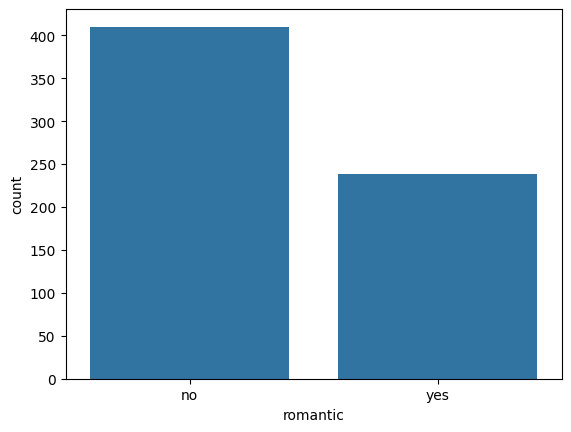

In [9]:
sns.countplot(data=stud,x="romantic") #Dataset is skewed towards no relationship

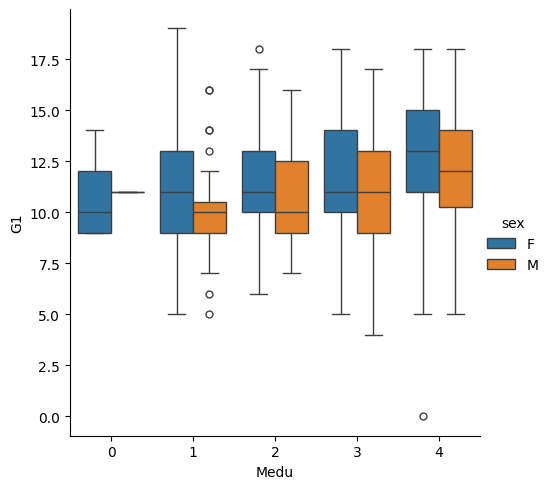

In [11]:
sns.catplot(data=stud,x="Medu",y="G1",hue="sex",kind="box")
plt.show()
#Q1) does parents education directly affect student performance?
#It seems that while there is no clear corelation, very educated parents tend to have much more succesful children

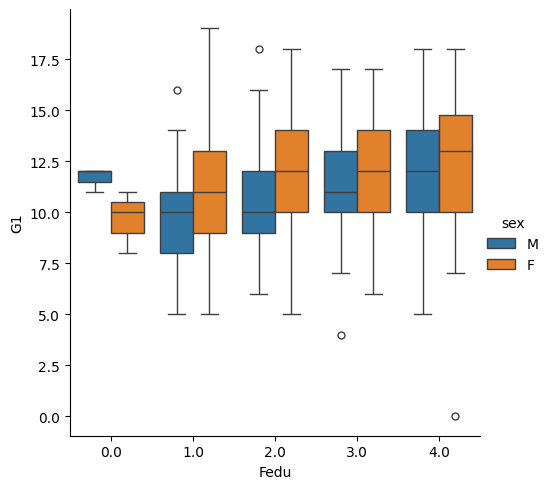

In [13]:
sns.catplot(data=stud,x="Fedu",y="G1",hue="sex",kind="box")
plt.show()
#Similar situation with Father Education and Mother education

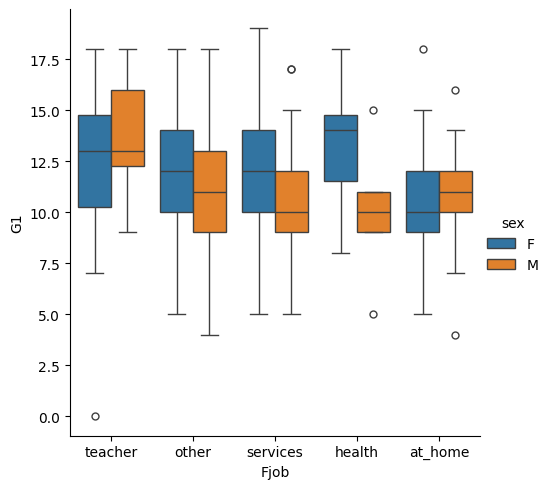

In [14]:
sns.catplot(data=stud,x="Fjob",y="G1",kind="box",hue="sex")
#Q2)Which profession parents tend to have best performing children?
#Ans: Teachers by a clear margin

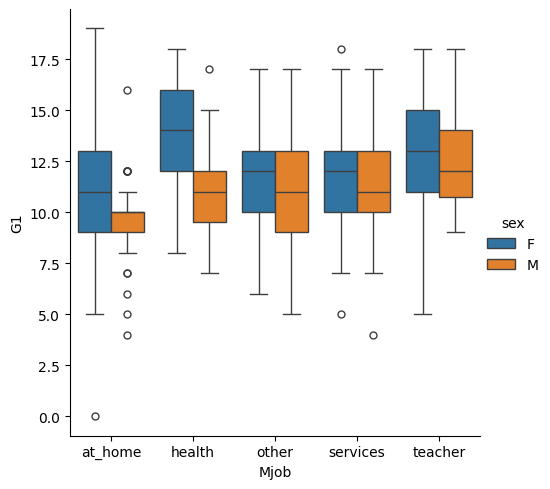

In [15]:
sns.catplot(data=stud,x="Mjob",y="G1",kind="box",hue="sex")

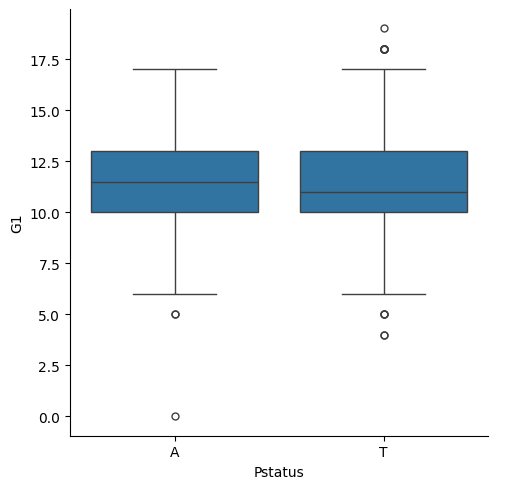

In [17]:
sns.catplot(data=stud,x="Pstatus",y="G1",kind="box")
#Q3)Do parents being separated affect child performance?
#Ans: Not at all

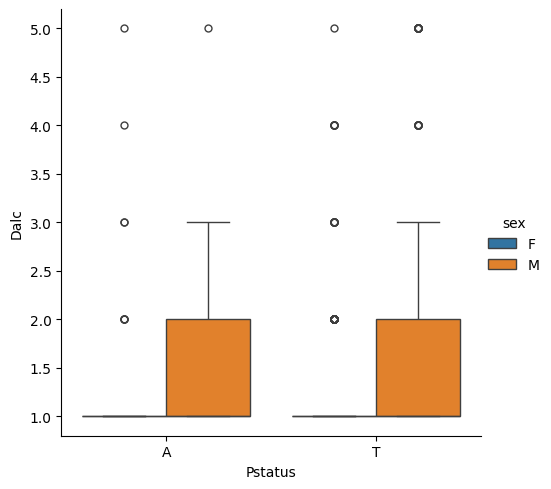

In [19]:
sns.catplot(data=stud,x="Pstatus",y="Dalc",kind="box",hue="sex")
#Q4) Does parents being separated affect alcohol consumption in children?
#Ans: No corelation

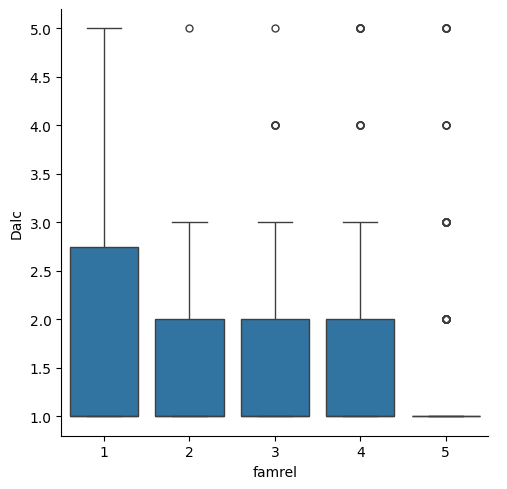

In [21]:
sns.catplot(data=studsns.catplot(data=student,x="famsize",y="G1",kind="box",hue="sex"),x="famrel",y="Dalc",kind="box")
plt.show()
#Q5) Does relationship with family affect alcohol consumption?
#Ans: Yes. Children with very good relation with parents consume much less alcohol

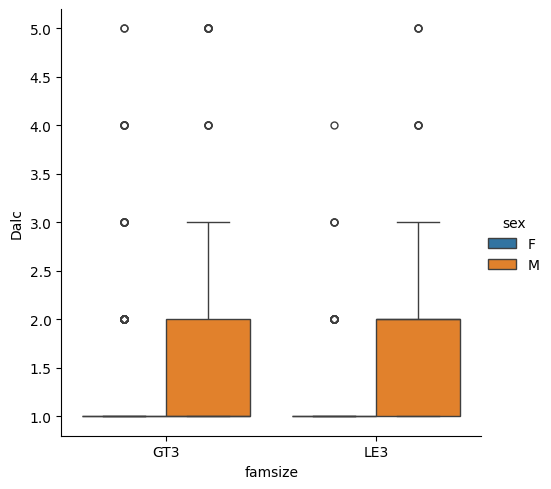

In [24]:
sns.catplot(data=stud,x="famsize",y="Dalc",kind="box",hue="sex")

In [36]:
stud_final = pd.get_dummies(noblank, drop_first=True)

In [37]:
stud_final.columns

Index(['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Medu_1',
       'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_1.0',
       ...
       'Feature_1_21.0', 'Feature_1_22.0', 'Feature_2_2.0', 'Feature_2_3.0',
       'Feature_2_4.0', 'Feature_3_2.0', 'Feature_3_3.0', 'Feature_3_4.0',
       'Feature_3_5.0', 'romantic_yes'],
      dtype='object', length=144)

In [113]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size = 0.2,random_state=43)
for trainidx,testidx in split.split(stud_final,stud_final["sex_M"]):
    strat_train_set = stud_final.loc[trainidx]
    strat_test_set = stud_final.loc[testidx]
    

In [114]:
X_train = strat_train_set.drop(['romantic_yes'], axis=1)
y_train = strat_train_set['romantic_yes']

X_test = strat_test_set.drop(['romantic_yes'], axis=1)
y_test = strat_test_set['romantic_yes']


In [115]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [116]:
y_pred = model.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6461538461538462
Confusion Matrix:
 [[67 19]
 [27 17]]
Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.78      0.74        86
        True       0.47      0.39      0.42        44

    accuracy                           0.65       130
   macro avg       0.59      0.58      0.58       130
weighted avg       0.63      0.65      0.64       130



In [125]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state = 48)
rfmodel.fit(X_train,y_train)
y_pred_rf = rfmodel.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
#Models have a strong tendency to skew to making false negative, could be caused by skew in the dataset

Random Forest Accuracy: 0.7
Confusion Matrix:
 [[82  4]
 [35  9]]
Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.95      0.81        86
        True       0.69      0.20      0.32        44

    accuracy                           0.70       130
   macro avg       0.70      0.58      0.56       130
weighted avg       0.70      0.70      0.64       130

